In [74]:
!git clone https://github.com/dtylor/WalkRNN.git
%cd WalkRNN
!ls

Cloning into 'WalkRNN'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 410 (delta 37), reused 20 (delta 6), pack-reused 326
Receiving objects: 100% (410/410), 2.17 MiB | 19.62 MiB/s, done.
Resolving deltas: 100% (217/217), done.
/content/WalkRNN/WalkRNN
Demonstration.ipynb  LICENSE-3RD-PARTY.txt  MUTAG.ipynb     test.py
examples	     LICENSE.md		    n2v		    TODO
graphwave	     module.py		    OrgChart.ipynb  utilities.py
__init__.py	     Motivation.ipynb	    README.md


In [75]:
 !curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   287  100   287    0     0   2657      0 --:--:-- --:--:-- --:--:--  2657
bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">'


In [0]:
import fastai
import pandas as pd

In [77]:
from fastai.utils.show_install import *
show_install()



```text
=== Software === 
python        : 3.6.8
fastai        : 1.0.57
fastprogress  : 0.1.21
torch         : 1.2.0
nvidia driver : 418.67
torch cuda    : 10.0.130 / is available
torch cudnn   : 7602 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 11441MB | Tesla K80

=== Environment === 
platform      : Linux-4.14.137+-x86_64-with-Ubuntu-18.04-bionic
distro        : #1 SMP Thu Aug 8 02:47:02 PDT 2019
conda env     : Unknown
python        : /usr/bin/python3
sys.path      : 
/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython
../
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be installed with:
pip install distro
Once installed, re-r

In [78]:
str(fastai.__dict__['version'])
!more /usr/local/lib/python3.6/dist-packages/fastai/version.py

__all__ = ['__version__']
__version__ = '1.0.57'


In [79]:
!ls

Demonstration.ipynb  LICENSE-3RD-PARTY.txt  MUTAG.ipynb     test.py
examples	     LICENSE.md		    n2v		    TODO
graphwave	     module.py		    OrgChart.ipynb  utilities.py
__init__.py	     Motivation.ipynb	    README.md


In [0]:
from google.colab import drive

In [81]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
from utilities import load_graph_kernel_graph, load_graph_kernel_labels, transform_graph


Gkern = load_graph_kernel_graph("./examples/data/MUTAG")
y = load_graph_kernel_labels("./examples/data/MUTAG")


DONE


In [83]:
Gkern.nodes[12]

{'component': 1, 'label_0': 0}

In [84]:
#Transform networkx property graph into a format prepared for WalkRNN
G, current_vocab_size = transform_graph(Gkern, params={'num_kmeans_clusters': 5, "num_pca_components": 6, "num_batch":200, 'num_att_kmeans_clusters': 10})

finished graphwave_alg batches


In [85]:
G.nodes[12]

{'component': 1, 'label_0': 0, 'structure': 8}

In [0]:
import matplotlib.pyplot as plt
import networkx as nx
# create number for each group to allow use of colormap
from itertools import count


def plotGW(tmpG, comp_no):
 # get unique groups
 groups = set(nx.get_node_attributes(tmpG,'structure').values())

 mapping = dict(zip(sorted(groups),count()))
  
 comp_nodes = [x for x,y in tmpG.nodes(data=True) if y['component']==comp_no]
 print(len(comp_nodes))
 subgraph = tmpG.subgraph(comp_nodes)
 nodes = subgraph.nodes()
 colors = [mapping[subgraph.node[n]['structure']] for n in nodes]

 # drawing nodes and edges separately so we can capture collection for colobar
 pos = nx.spring_layout(subgraph)
 ec = nx.draw_networkx_edges(subgraph, pos, with_labels=True,alpha=0.2)
 nc = nx.draw_networkx_nodes(subgraph, pos, nodelist=nodes, node_color=colors, 
                            with_labels=True, node_size=100, cmap=plt.cm.jet, vmin=0,vmax=3)
 plt.colorbar(nc)
 plt.axis('off')
 plt.show()
 print(nx.get_node_attributes(subgraph,'structure'))
 

17


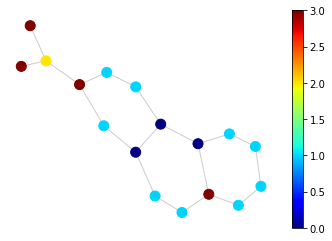

{1: 8, 2: 8, 3: 8, 4: 7, 5: 10, 6: 8, 7: 8, 8: 8, 9: 7, 10: 7, 11: 8, 12: 8, 13: 10, 14: 8, 15: 9, 16: 11, 17: 11}


In [87]:

plotGW(G,1)

13


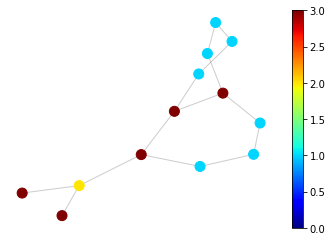

{18: 8, 19: 8, 20: 10, 21: 8, 22: 8, 23: 8, 24: 8, 25: 10, 26: 10, 27: 8, 28: 9, 29: 11, 30: 11}


In [88]:
plotGW(G,2)

13


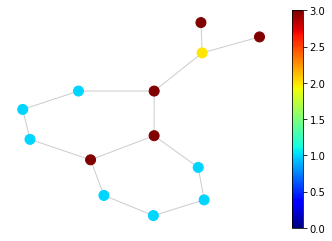

{32: 8, 33: 10, 34: 10, 35: 8, 36: 8, 37: 8, 38: 8, 39: 10, 40: 8, 41: 9, 42: 11, 43: 11, 31: 8}


In [89]:
plotGW(G,3)

12


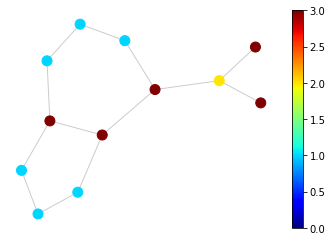

{2688: 8, 2689: 8, 2690: 8, 2691: 10, 2692: 10, 2693: 8, 2694: 9, 2695: 11, 2696: 11, 2685: 8, 2686: 8, 2687: 10}


In [90]:
plotGW(G,151)

17


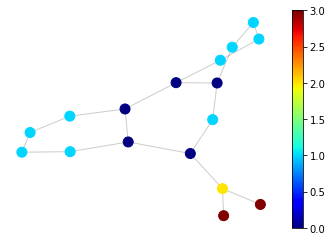

{167: 8, 168: 8, 169: 8, 170: 7, 171: 7, 172: 8, 173: 8, 174: 7, 175: 7, 176: 7, 177: 8, 178: 8, 179: 8, 180: 8, 181: 9, 182: 11, 183: 11}


In [91]:
plotGW(G,11)

14


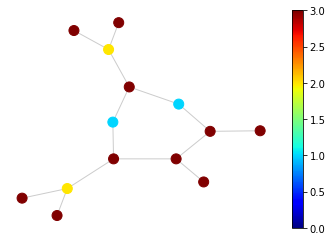

{2832: 8, 2833: 10, 2834: 8, 2835: 10, 2836: 10, 2837: 10, 2838: 9, 2839: 11, 2840: 11, 2841: 11, 2842: 11, 2843: 9, 2844: 11, 2845: 11}


In [92]:
plotGW(G,160)

17


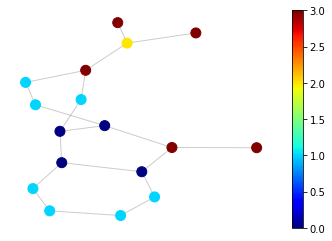

{291: 8, 292: 8, 293: 8, 294: 7, 295: 7, 296: 8, 297: 7, 298: 8, 299: 10, 300: 8, 301: 8, 302: 7, 303: 10, 304: 11, 305: 9, 306: 11, 307: 11}


In [93]:
plotGW(G,18)

16


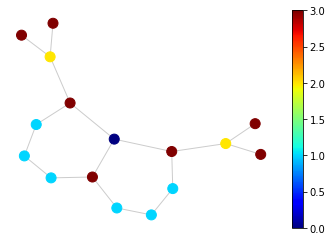

{2528: 8, 2529: 10, 2530: 7, 2531: 10, 2532: 8, 2533: 9, 2534: 11, 2535: 11, 2536: 9, 2537: 11, 2538: 11, 2523: 8, 2524: 8, 2525: 10, 2526: 8, 2527: 8}


In [94]:
plotGW(G,140)

In [0]:
from module import walk_as_string

In [96]:
walks = walk_as_string(G, componentLabels = y)

Walk iteration:
('1', '/', '20')
('2', '/', '20')
('3', '/', '20')
('4', '/', '20')
('5', '/', '20')
('6', '/', '20')
('7', '/', '20')
('8', '/', '20')
('9', '/', '20')
('10', '/', '20')
('11', '/', '20')
('12', '/', '20')
('13', '/', '20')
('14', '/', '20')
('15', '/', '20')
('16', '/', '20')
('17', '/', '20')
('18', '/', '20')
('19', '/', '20')
('20', '/', '20')


/content/WalkRNN/module.py:140: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  sorted_walks = pd.DataFrame(walks).sort_values(0).as_matrix()


[1 2 1 6 1 2 1 2 3 4 3 4 3 2 1 6 1 6 1 2 1 6 1 6 5 4 3 2 1 6]
[1 2 3 4 3 4 3 2 1 6 5 4 5 6 1 2 3 4 3 2 1 6 1 6 1 6 1 2 3 4]
[ 1  2  3  4 10  9  8  7  5  4  3  4  3  2  3  4 10  9 14 13 12 13 12 13 15 17 15 13 14 13]


In [0]:
from fastai.text import *
from sklearn.model_selection import train_test_split
import numpy

In [98]:
walks.head()

,walk,label,start_node,component
0,0 8 12 0 8 12 0 8 12 0 8 12 0 8 12 0 8 12 0 8 ...,1,1,1
1,0 8 12 0 8 12 0 8 12 0 7 12 0 8 12 0 7 12 0 8 ...,1,1,1
2,0 8 12 0 8 12 0 8 12 0 7 12 0 7 12 0 7 12 0 8 ...,1,1,1
3,0 8 12 0 8 12 0 10 12 0 8 12 0 10 12 0 7 12 0 ...,1,1,1
4,0 8 12 0 8 12 0 8 12 0 8 12 0 10 12 0 8 12 0 8...,1,1,1


In [99]:
walks.shape

(67420, 4)

In [0]:
from sklearn.model_selection import train_test_split
import numpy
data = list(set(walks.component))
x_traina ,x_test = train_test_split(data,test_size=0.1)    
x_train ,x_val = train_test_split(x_traina,test_size=0.2)  


In [101]:
train_tmp = pd.DataFrame(x_train)
train_tmp.columns = ['component']
df_train = pd.merge(walks, train_tmp, on='component', sort=False)
df_train.shape

(49060, 4)

In [102]:
test_tmp = pd.DataFrame(x_test)
test_tmp.columns = ['component']
df_test = pd.merge(walks, test_tmp, on='component', sort=False)
df_test.shape

(6500, 4)

In [103]:
val_tmp = pd.DataFrame(x_val)
val_tmp.columns = ['component']
df_val = pd.merge(walks, val_tmp, on='component', sort=False)
df_val.shape

(11860, 4)

In [0]:
!mkdir result
mypath = './result'

In [0]:
data_lm = TextLMDataBunch.from_df(train_df=df_train[['walk', 'label']], valid_df=df_val[[
                                  'walk', 'label']],  path=mypath, text_cols='walk', label_cols='label')


In [0]:
data_lm.save('data_lm.pkl')

In [107]:
!ls -l ./result

total 57380
-rw-r--r-- 1 root root 58754572 Sep 30 20:43 data_lm.pkl


In [0]:
bs = 32
# load the data (can be used in the future as well to prevent reprocessing)
data_lm = load_data(mypath, 'data_lm.pkl', bs=bs)


In [109]:
data_lm.show_batch() # take a look at the batch fed into the GPU

idx,text
0,0 8 12 0 10 12 0 7 12 0 8 12 0 8 12 0 8 12 0 8 xxbos 0 8 12 0 8 12 0 8 12 0 7 12 0 8 12 0 7 12 0 8 12 0 8 12 0 8 12 0 8 12 0 10 12 0 7 12 0 10 12 0 8 12 0 8 12 0 8 12 0
1,12 0 8 12 0 10 12 0 8 xxbos 2 11 14 0 9 13 0 11 13 0 9 13 2 8 13 0 10 12 0 8 12 0 10 13 2 8 13 0 10 12 0 8 12 0 10 12 0 8 12 0 10 13 2 8 13 0 10 12 0 8 12 0 7 12 0 7 13 0 7 12
2,8 13 0 10 13 0 8 13 0 10 13 0 8 14 0 8 13 0 10 14 0 8 13 0 10 13 0 10 13 0 8 13 0 10 13 0 8 13 0 10 13 0 8 14 0 8 13 0 10 13 1 9 14 2 11 14 1 9 13 0 10 13 0 8 13 0 10 13 1 9
3,0 8 12 0 7 12 0 7 12 0 8 12 0 7 12 0 8 12 0 7 12 0 7 12 0 7 12 0 8 12 0 7 12 0 8 12 0 7 12 0 8 12 0 7 12 0 7 12 0 7 13 0 7 14 0 8 13 0 7 13 0 8 13 0 7 12 0 7 12 0
4,2 11 14 0 7 13 0 7 13 0 7 14 2 11 14 0 7 13 0 7 12 0 8 12 0 7 13 0 7 13 0 7 12 0 8 12 0 10 12 0 8 12 0 10 13 1 9 14 2 11 14 1 9 13 0 10 12 0 8 12 0 10 12 0 8 xxbos 0 8 12 0


In [0]:
awd_lstm_lm_config = dict(emb_sz=400, n_hid=600, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.1, hidden_p=0.15, input_p=0.25, embed_p=0.02, weight_p=0.2, tie_weights=True, out_bias=True)
awd_lstm_clas_config = dict(emb_sz=400, n_hid=600, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.4,  hidden_p=0.3, input_p=0.4, embed_p=0.05, weight_p=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,0.414550,0.441080,0.811222,01:05


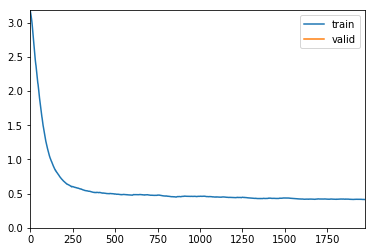

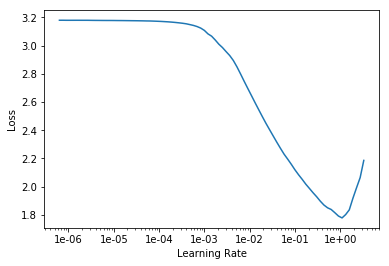

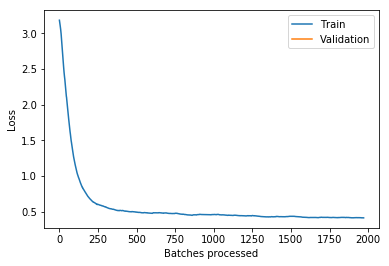

In [111]:

learn = language_model_learner(data_lm,arch=AWD_LSTM,config= awd_lstm_lm_config,drop_mult=1.9, callback_fns=ShowGraph,pretrained=False)
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learn.recorder.plot_losses()
learn.save('fit-head')



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


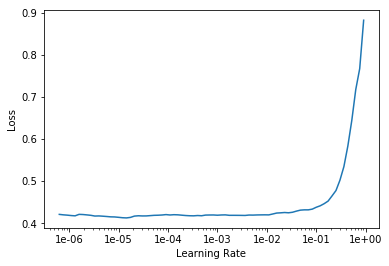

In [112]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.424827,0.448889,0.810190,01:05
1,0.418740,0.449461,0.811898,01:05
2,0.401584,0.438019,0.814353,01:05
3,0.391283,0.440297,0.813870,01:05


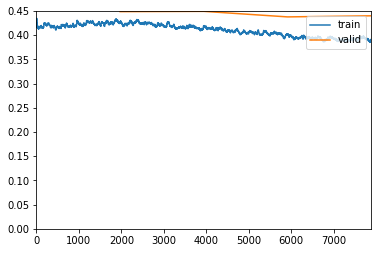

In [113]:
learn.fit_one_cycle(4, .01, moms=(0.8,0.7))

In [0]:
learn.save('fit-head')

In [0]:
learn.save_encoder('fine_tuned_enc3')

In [116]:
df = walks.sample(frac=1).reset_index(drop=True)
df['index1']=df.index

g = df.groupby('component')
df['RN'] = g['index1'].rank(method='min')

df[df['component']==1].head()


,walk,label,start_node,component,index1,RN
55,2 11 14 1 9 13 0 10 12 0 8 12 0 7 12 0 8 12 0 ...,1,16,1,55,1.0
514,0 10 13 1 9 13 2 11 13 1 9 14 2 11 14 1 9 13 0...,1,13,1,514,2.0
745,0 8 12 0 8 12 0 8 12 0 8 12 0 8 12 0 10 12 0 8...,1,6,1,745,3.0
1048,0 8 12 0 8 12 0 10 12 0 8 12 0 10 12 0 7 12 0 ...,1,8,1,1048,4.0
1128,0 7 12 0 8 12 0 7 12 0 8 12 0 7 12 0 8 12 0 10...,1,9,1,1128,5.0


Choose a path per node and concatenate for entire component

In [117]:
df.groupby('component')['walk'].apply(lambda x: ', '.join(x))

def f(x):
     return Series(dict(label = x['label'].min(), text =  ', '.join(x['walk'])))
df_text_comp = df[(df['RN']<=9.0)].groupby('component').apply(f)
df_text_comp.head()

,label,text
component,,
1,1,2 11 14 1 9 13 0 10 12 0 8 12 0 7 12 0 8 12 0 ...
2,-1,0 8 12 0 8 12 0 8 12 0 8 12 0 8 12 0 8 12 0 10...
3,-1,0 8 12 0 8 12 0 10 12 1 8 12 0 8 12 0 8 12 0 8...
4,1,0 8 12 0 8 12 0 8 12 0 8 12 0 7 12 0 8 12 0 8 ...
5,-1,3 11 13 0 9 12 0 8 12 0 9 12 0 8 12 0 10 13 1 ...


In [118]:
df_text_comp['component']= df_text_comp.index
df_text_comp.index.names = ['comp']
df_text_comp.head()

,label,text,component
comp,,,
1,1,2 11 14 1 9 13 0 10 12 0 8 12 0 7 12 0 8 12 0 ...,1
2,-1,0 8 12 0 8 12 0 8 12 0 8 12 0 8 12 0 8 12 0 10...,2
3,-1,0 8 12 0 8 12 0 10 12 1 8 12 0 8 12 0 8 12 0 8...,3
4,1,0 8 12 0 8 12 0 8 12 0 8 12 0 7 12 0 8 12 0 8 ...,4
5,-1,3 11 13 0 9 12 0 8 12 0 9 12 0 8 12 0 10 13 1 ...,5


In [119]:
train = pd.merge(df_text_comp, train_tmp, on='component', sort=False)
test =  pd.merge(df_text_comp, test_tmp, on='component', sort=False)
val =  pd.merge(df_text_comp, val_tmp, on='component', sort=False)
(train.shape,val.shape, test.shape, train.shape[0]/df_text_comp.shape[0])

((135, 3), (34, 3), (19, 3), 0.7180851063829787)

In [0]:
bs=32#48

data_clas = TextClasDataBunch.from_df(train_df=train[['text','label']],valid_df=val[['text','label']],  path=mypath, text_cols='text',label_cols = 'label', vocab=data_lm.vocab)


In [0]:
data_clas.save('tmp_clas')

In [0]:
data_clas = load_data(mypath, 'tmp_clas', bs=bs)


In [123]:
data_clas.show_batch()

text,target
xxbos 0 7 12 0 7 12 0 8 12 0 7 12 0 7 12 0 7 12 0 8 12 0 8 12 0 7 12 0 8 12 0 8 12 0 7 12 0 7 12 0 7 12 0 7 13 1 9 13 2 11 13 1 9 13 2 11 13 1 9 13 2 11 13 1 9 13 2 11 13,1
xxbos 0 8 12 0 8 12 0 7 12 0 8 12 0 8 12 0 7 12 0 7 12 0 7 12 0 7 12 0 7 12 0 7 12 0 7 12 0 7 12 0 7 12 0 8 12 0 8 12 0 7 12 0 7 12 0 8 12 0 7 12 0 7 12 0 7 12 0 7 12,1
xxbos 0 8 13 0 7 13 0 8 13 0 7 12 0 8 12 0 7 13 0 8 13 0 7 12 0 8 12 0 7 12 0 7 12 0 7 13 0 8 13 0 7 12 0 8 12 0 7 12 0 7 12 0 7 12 0 8 12 0 10 13 1 9 13 0 10 12 0 8 12,1
xxbos 1 9 13 0 7 12 0 7 12 0 8 12 0 7 12 0 8 12 0 7 13 1 9 13 2 11 13 1 9 14 2 11 14 1 9 13 2 11 13 1 9 13 0 7 12 0 8 12 0 7 12 0 7 13 1 9 13 2 11 13 1 9 14 2 11 14 1 9 13,1
xxbos 0 7 12 0 7 12 0 7 13 0 8 13 0 7 13 0 8 13 0 8 13 0 8 13 0 7 12 0 10 12 0 7 12 0 10 12 0 7 12 0 10 13 1 9 13 2 11 13 1 9 14 2 11 14 1 9 13 0 10 12 0 7 12 0 7 12 0 10 12,1


In [0]:
learn = text_classifier_learner(data_clas,arch=AWD_LSTM,config = awd_lstm_clas_config, drop_mult=2.0,pretrained=False)
learn.load_encoder('fine_tuned_enc3')
learn.freeze()

In [0]:
gc.collect();

In [126]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


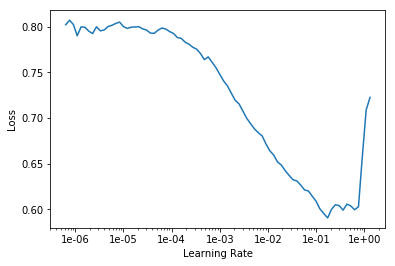

In [127]:
learn.recorder.plot()

In [128]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.697614,0.643782,0.735294,00:01


In [0]:
def predict(test,learn):
  predictions=[]
  for index, row in test.iterrows():
    p=learn.predict(row['text'])
    #print((row['label'],str(p[0])))
    predictions.append((row['text'],str(row['label']),str(p[0])))
  dfpred = pd.DataFrame(predictions)
  dfpred.columns=['text','label','prediction']
  match=dfpred[(dfpred['label']==dfpred['prediction'])]
  #match.head()
  print((dfpred.shape[0], match.shape[0],match.shape[0]/dfpred.shape[0]))

In [130]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.470102,0.587947,0.647059,00:01


In [131]:
learn.unfreeze()
learn.fit_one_cycle(8, slice(5e-3/(2.6**4),5e-03), moms=(0.8,0.7))



epoch,train_loss,valid_loss,accuracy,time
0,0.379812,0.592625,0.647059,00:02
1,0.442237,0.602042,0.647059,00:02
2,0.461149,0.598975,0.647059,00:02
3,0.455854,0.573774,0.647059,00:02
4,0.448641,0.568151,0.647059,00:02
5,0.436493,0.562528,0.647059,00:02
6,0.432191,0.536410,0.647059,00:02
7,0.420771,0.521695,0.647059,00:02


In [132]:
predict(test,learn)

(19, 14, 0.7368421052631579)


In [133]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.422744,0.510298,0.676471,00:02
1,0.398236,0.494306,0.676471,00:02
2,0.391997,0.461479,0.676471,00:02
3,0.416498,0.462355,0.647059,00:02
4,0.409002,0.423708,0.764706,00:02
5,0.393911,0.398497,0.735294,00:01
6,0.383566,0.375568,0.823529,00:02
7,0.378033,0.367244,0.823529,00:02
8,0.379892,0.363422,0.794118,00:02
9,0.384481,0.354943,0.823529,00:02


In [134]:
predict(test,learn)

(19, 15, 0.7894736842105263)


In [135]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.322137,0.354932,0.882353,00:02
1,0.318151,0.349400,0.882353,00:02
2,0.332832,0.350905,0.882353,00:02
3,0.323734,0.350084,0.882353,00:02
4,0.323887,0.344594,0.852941,00:02
5,0.330232,0.348928,0.852941,00:02
6,0.333758,0.359406,0.794118,00:02
7,0.346394,0.363273,0.794118,00:01
8,0.346261,0.366705,0.764706,00:01
9,0.340878,0.366019,0.764706,00:01


In [136]:
predict(test,learn)

(19, 15, 0.7894736842105263)


In [137]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.320585,0.357161,0.852941,00:01
1,0.323662,0.357018,0.823529,00:02
2,0.321183,0.358051,0.764706,00:02
3,0.319688,0.353599,0.764706,00:02
4,0.323084,0.346198,0.794118,00:01
5,0.325172,0.349923,0.823529,00:01
6,0.320281,0.353898,0.852941,00:01
7,0.317863,0.358387,0.852941,00:02
8,0.322014,0.366157,0.852941,00:02
9,0.321732,0.361192,0.852941,00:02


In [138]:
predict(test,learn)

(19, 16, 0.8421052631578947)


In [139]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.386519,0.348333,0.852941,00:02
1,0.330562,0.350145,0.852941,00:02
2,0.319961,0.354689,0.852941,00:02
3,0.305284,0.352929,0.882353,00:02
4,0.305305,0.346657,0.823529,00:02
5,0.306969,0.350155,0.794118,00:02
6,0.312537,0.345465,0.794118,00:02
7,0.307896,0.350083,0.794118,00:02
8,0.324698,0.354628,0.794118,00:02
9,0.319594,0.356969,0.794118,00:02


In [140]:
predict(test,learn)

(19, 15, 0.7894736842105263)


In [141]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.306677,0.356910,0.794118,00:02
1,0.303517,0.353261,0.794118,00:02
2,0.319168,0.350569,0.794118,00:02
3,0.327272,0.350702,0.794118,00:02
4,0.316081,0.358292,0.794118,00:02
5,0.322105,0.350090,0.794118,00:02
6,0.310597,0.354426,0.823529,00:02
7,0.306632,0.360546,0.823529,00:02
8,0.299012,0.360622,0.852941,00:02
9,0.304079,0.364705,0.852941,00:02


In [142]:
predict(test,learn)

(19, 16, 0.8421052631578947)


In [143]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.298175,0.364137,0.852941,00:02
1,0.289331,0.357885,0.852941,00:02
2,0.300752,0.361590,0.852941,00:02
3,0.290212,0.354324,0.852941,00:02
4,0.307170,0.342542,0.852941,00:02
5,0.305818,0.343887,0.852941,00:02
6,0.302700,0.357232,0.852941,00:02
7,0.301229,0.361638,0.852941,00:02
8,0.301206,0.353847,0.882353,00:02
9,0.293898,0.351083,0.882353,00:02


In [144]:
predict(test,learn)

(19, 16, 0.8421052631578947)


In [145]:
learn.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(24, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(24, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.8, inplace=False)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace=True)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Dropout(p=0.1, inplace=False)
      (6): Linear(in_features=50, out_features=2, bias=True)
    )
  )
)